<a href="https://colab.research.google.com/github/angeruzzi/MachineLearningRef/blob/main/ValidacaoModelos_Holdout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Métodos de Validação de Modelos

In [1]:
#Importação das bibliotecas Utilizadas
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression #LinearRegression
from sklearn.metrics import mean_squared_error #EQM

from sklearn.model_selection import train_test_split #Holdout


In [2]:
#Dados Utilizados
fonte = 'https://raw.githubusercontent.com/angeruzzi/Datasource/main/exampleDataInsurance.csv'
dados = pd.read_csv(fonte)
#Tratativas
dados['smoker'] = dados['smoker'].map({'yes':1, 'no':0})
dados['charges'] = dados['charges']/1000
dados = dados[['bmi', 'smoker', 'charges']]

In [3]:
#Modelo de exemplo: Linear Regression
#Criando um modelo para previsão de custos de seguro de saúde baseados nas variáveis BMI (ICM) e SMOKER (fumante)
X = dados[['bmi', 'smoker']]
y = dados['charges'] 
regressao = LinearRegression()
regressao.fit(X, y)
preditos = regressao.predict(X)

##HOLDOUT

Técnica de validação em que se separa o conjunto de dados em Treino e Teste

In [4]:
#Separando os dados em teste e treinamento
#4 conjuntos são retornados:
#Xtreino: Dados para treino 
#Xteste : Dados para os testes 
#ytreino: variável retorno equivalente ao treino
#yteste : variável retorno equivalente ao teste
#Parâmetros de entrada: (Conjunto das variáveis de entrada, conjunto da variável de retorno, % que será destinado ao conjunto de testes)
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25) 

#Imprimir os dados gerados
#train_test_split(X, y, test_size = 0.25)

In [5]:
#Ajuste do modelo nos dados de TREINO
regressaoT = LinearRegression()
regressaoT.fit(Xtreino, ytreino)

#Utilize o modelo ajustado para predizer os dados de TESTE
preditosT = regressaoT.predict(Xteste)

#Calcule o Erro Quadrático Médio nos dados de TESTE
eqm = mean_squared_error(yteste, preditosT)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 56.72


##HOLDOUT REPETIDO

Aplicar a técnica de HOLDOUT n vezes armazenando o EQM e no fim considera a média dos resultados.

In [10]:
R = 1000
eqms = []
maes = []

for i in range(R):
  Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)
  reg = LinearRegression()
  reg.fit(Xtreino, ytreino)
  preditos = reg.predict(Xteste)
  eqm = mean_squared_error(yteste, preditos)
  eqms.append(eqm)

print(np.mean(eqms))


50.53915919992743


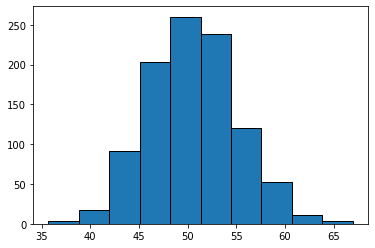

In [11]:
import matplotlib.pyplot as plt

plt.hist(eqms, edgecolor = 'black')
plt.show()